In [1]:
from matplotlib import pyplot as plt
from google.cloud import vision
from PIL import Image, ImageDraw
client = vision.ImageAnnotatorClient()

In [20]:
macron = 'macron.png'
sport = 'sport.jpg'
ufc = 'ufc.jpg'

In [3]:
def detect_faces(input_filename):
    with open(input_filename, 'rb') as image:
        content = image.read()
        image = vision.types.Image(content=content)
        response = client.face_detection(image=image)
        faces = response.face_annotations
        # faces = detect_face(image)
        
        im = Image.open(input_filename)
        draw = ImageDraw.Draw(im)
        for face in faces:
            box = [(vertex.x, vertex.y)
                   for vertex in face.bounding_poly.vertices]
            draw.line(box + [box[0]], width=5, fill='#00ff00')
            plt.imshow(im)
            plt.axis('off')
            
        likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
        print('Faces:')

        for face in faces:
            print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
            print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
            print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))
            print('sorrow: {}'.format(likelihood_name[face.surprise_likelihood]))

In [4]:
def detect_safe(input_filename):

    with open(input_filename, 'rb') as image:
        
        response = client.safe_search_detection(image=image)
        safe = response.safe_search_annotation

        likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                           'LIKELY', 'VERY_LIKELY')
        print('Safe search:')

        print('adult: {}'.format(likelihood_name[safe.adult]))
        print('medical: {}'.format(likelihood_name[safe.medical]))
        print('spoofed: {}'.format(likelihood_name[safe.spoof]))
        print('violence: {}'.format(likelihood_name[safe.violence]))
        print('racy: {}'.format(likelihood_name[safe.racy]))

Faces:
anger: VERY_LIKELY
joy: VERY_UNLIKELY
surprise: LIKELY
sorrow: LIKELY
Safe search:
adult: VERY_UNLIKELY
medical: VERY_UNLIKELY
spoofed: LIKELY
violence: UNLIKELY
racy: VERY_UNLIKELY


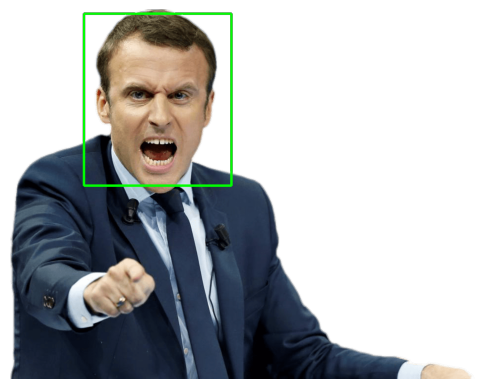

In [22]:
detect_faces(macron)
detect_safe(macron)

Faces:
anger: UNLIKELY
joy: VERY_UNLIKELY
surprise: LIKELY
sorrow: LIKELY
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
Safe search:
adult: VERY_UNLIKELY
medical: VERY_UNLIKELY
spoofed: UNLIKELY
violence: UNLIKELY
racy: POSSIBLE


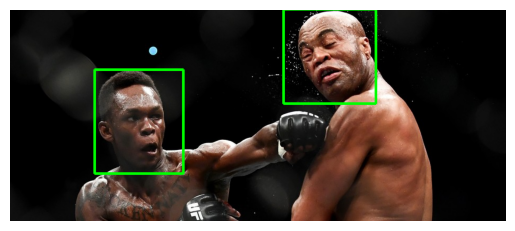

In [21]:
highlight_faces(ufc)
detect_safe(ufc)

Faces:
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
Safe search:
adult: VERY_UNLIKELY
medical: VERY_UNLIKELY
spoofed: UNLIKELY
violence: UNLIKELY
racy: VERY_UNLIKELY


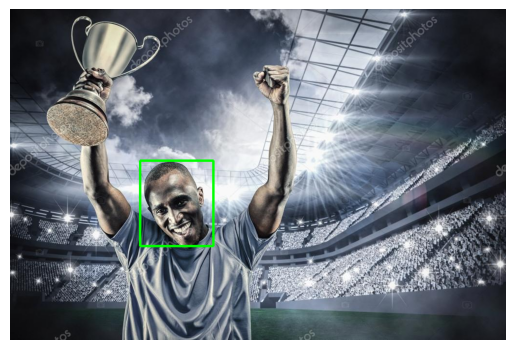

In [23]:
highlight_faces(sport)
detect_safe(sport)